# LSTM Model

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Loading the data

In [ ]:

df = pd.read_csv('data_nextday.csv')


# Defining features and target

In [11]:

features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'precipIntensity', 'hour', 'day_of_week', 'month', 'season']
X = df[features].values
y = df['demand_next_day'].values

# Reshaping data for LSTM (3D array: samples, time steps, features)

In [ ]:

X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))

# Building the LSTM model

In [ ]:

model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compiling the model

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')


# Fiting the model

In [ ]:

model.fit(X_lstm, y, epochs=50, batch_size=32)


Epoch 1/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 36.3787
Epoch 2/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0021
Epoch 3/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0021
Epoch 4/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0020
Epoch 5/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 6/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 7/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0020
Epoch 8/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 9/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0020
Epoch 10/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0020
Epoch 11/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 12/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 13/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 14/50
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0020
Epoch 15/50
4990/4990 ━━━━━━

# Make predictions

In [ ]:

y_pred_lstm = model.predict(X_lstm)

4990/4990 ━━━━━━━━━━━━━━━━━━━━ 4s 804us/step


In [17]:
y_true = y.ravel()
y_pred = y_pred_lstm.ravel()

mae_lstm = mean_absolute_error(y_true, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))

nonzero_mask = y_true != 0
mape_lstm = (np.abs(y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask]).mean() * 100

print(f'LSTM - MAE: {mae_lstm}')
print(f'LSTM - RMSE: {rmse_lstm}')
print(f'LSTM - MAPE: {mape_lstm}%')

LSTM - MAE: 0.03894687360294774
LSTM - RMSE: 0.0448673526788605
LSTM - MAPE: 74.45615211653968%


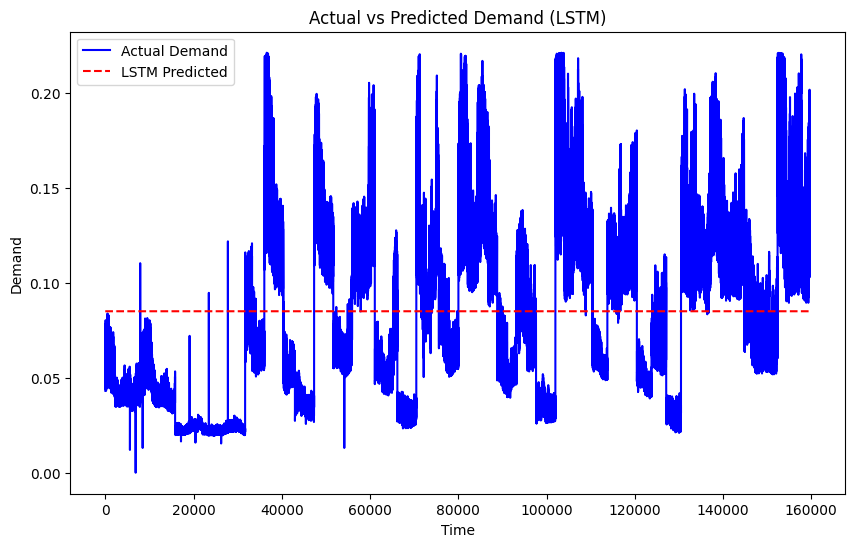

In [18]:
import matplotlib.pyplot as plt

# Visualize Actual vs Predicted for LSTM (as an example)
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual Demand', color='blue')
plt.plot(y_pred_lstm, label='LSTM Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Actual vs Predicted Demand (LSTM)')
plt.legend()
plt.show()
